In [8]:
import pandas as pd

# Load the datasets
orders_df = pd.read_csv("List_of_Orders.csv")
order_details_df = pd.read_csv("Order_Details.csv")
sales_target_df = pd.read_csv("Sales_target.csv")

# Display the first few rows of each dataset
print("Orders Dataset:")
print(orders_df.head())

print("\nOrder Details Dataset:")
print(order_details_df.head())

print("\nSales Target Dataset:")
print(sales_target_df.head())


Orders Dataset:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

Order Details Dataset:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones

Sales Target Dataset:
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Fu

In [9]:
# Merge datasets based on Order ID
merged_df = pd.merge(order_details_df, orders_df, on="Order ID", how="inner")

# Display merged dataset
print("Merged Dataset:")
print(merged_df.head())


Merged Dataset:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases   
1  B-25601    66.0   -12.0         5     Clothing             Stole   
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief   
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games   
4  B-25602   168.0  -111.0         2  Electronics            Phones   

   Order Date CustomerName        State       City  
0  01-04-2018       Bharat      Gujarat  Ahmedabad  
1  01-04-2018       Bharat      Gujarat  Ahmedabad  
2  01-04-2018       Bharat      Gujarat  Ahmedabad  
3  01-04-2018       Bharat      Gujarat  Ahmedabad  
4  01-04-2018        Pearl  Maharashtra       Pune  


In [10]:
total_sales_by_category = merged_df.groupby("Category")["Amount"].sum().reset_index()
print("Total Sales by Category:")
print(total_sales_by_category)


Total Sales by Category:
      Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0


In [11]:
avg_profit_per_order = merged_df.groupby("Category")["Profit"].mean().reset_index()
print("Average Profit Per Order by Category:")
print(avg_profit_per_order)


Average Profit Per Order by Category:
      Category     Profit
0     Clothing  11.762908
1  Electronics  34.071429
2    Furniture   9.456790


In [12]:
profit_margin_by_category = merged_df.groupby("Category").apply(
    lambda x: (x["Profit"].sum() / x["Amount"].sum()) * 100 if x["Amount"].sum() != 0 else 0
).reset_index(name="Profit Margin (%)")

print("Profit Margin by Category:")
print(profit_margin_by_category)


Profit Margin by Category:
      Category  Profit Margin (%)
0     Clothing           8.027817
1  Electronics           6.349725
2    Furniture           1.806874


In [13]:
# Combine all calculations into a single dataframe
category_performance_df = total_sales_by_category.merge(avg_profit_per_order, on="Category")
category_performance_df = category_performance_df.merge(profit_margin_by_category, on="Category")

# Sort to find top and underperforming categories
top_category = category_performance_df.sort_values(by="Profit Margin (%)", ascending=False).head(1)
underperforming_category = category_performance_df.sort_values(by="Profit Margin (%)").head(1)

print("Category Performance Summary:")
print(category_performance_df)

print("\nTop Performing Category:")
print(top_category)

print("\nUnderperforming Category:")
print(underperforming_category)


Category Performance Summary:
      Category    Amount     Profit  Profit Margin (%)
0     Clothing  139054.0  11.762908           8.027817
1  Electronics  165267.0  34.071429           6.349725
2    Furniture  127181.0   9.456790           1.806874

Top Performing Category:
   Category    Amount     Profit  Profit Margin (%)
0  Clothing  139054.0  11.762908           8.027817

Underperforming Category:
    Category    Amount   Profit  Profit Margin (%)
2  Furniture  127181.0  9.45679           1.806874


In [14]:
sales_target_df["Month of Order Date"] = pd.to_datetime(sales_target_df["Month of Order Date"], format="%b-%y")


In [15]:
furniture_target_df = sales_target_df[sales_target_df["Category"] == "Furniture"].sort_values("Month of Order Date")


In [16]:
furniture_target_df["Target Change (%)"] = furniture_target_df["Target"].pct_change() * 100
print("Month-over-Month Target Change for Furniture:")
print(furniture_target_df)


Month-over-Month Target Change for Furniture:
   Month of Order Date   Category   Target  Target Change (%)
0           2018-04-01  Furniture  10400.0                NaN
1           2018-05-01  Furniture  10500.0           0.961538
2           2018-06-01  Furniture  10600.0           0.952381
3           2018-07-01  Furniture  10800.0           1.886792
4           2018-08-01  Furniture  10900.0           0.925926
5           2018-09-01  Furniture  11000.0           0.917431
6           2018-10-01  Furniture  11100.0           0.909091
7           2018-11-01  Furniture  11300.0           1.801802
8           2018-12-01  Furniture  11400.0           0.884956
9           2019-01-01  Furniture  11500.0           0.877193
10          2019-02-01  Furniture  11600.0           0.869565
11          2019-03-01  Furniture  11800.0           1.724138


In [17]:
significant_fluctuations = furniture_target_df[abs(furniture_target_df["Target Change (%)"]) > 5]
print("Months with Significant Target Fluctuations:")
print(significant_fluctuations)


Months with Significant Target Fluctuations:
Empty DataFrame
Columns: [Month of Order Date, Category, Target, Target Change (%)]
Index: []


In [18]:
top_states = orders_df["State"].value_counts().head(5).reset_index()
top_states.columns = ["State", "Order Count"]
print("Top 5 States by Order Count:")
print(top_states)


Top 5 States by Order Count:
            State  Order Count
0  Madhya Pradesh          101
1     Maharashtra           90
2       Rajasthan           32
3         Gujarat           27
4          Punjab           25


In [19]:
state_sales_profit = merged_df.groupby("State").agg({"Amount": "sum", "Profit": "mean"}).reset_index()


In [20]:
top_states_performance = pd.merge(top_states, state_sales_profit, on="State")
print("Top 5 States Performance Summary:")
print(top_states_performance)

# Identify state with highest and lowest sales
highest_sales_state = top_states_performance.sort_values(by="Amount", ascending=False).head(1)
lowest_sales_state = top_states_performance.sort_values(by="Amount").head(1)

print("\nState with Highest Sales:")
print(highest_sales_state)

print("\nState with Lowest Sales:")
print(lowest_sales_state)


Top 5 States Performance Summary:
            State  Order Count    Amount     Profit
0  Madhya Pradesh          101  105140.0  16.326471
1     Maharashtra           90   95348.0  21.296552
2       Rajasthan           32   21149.0  16.986486
3         Gujarat           27   21058.0   5.344828
4          Punjab           25   16786.0 -10.150000

State with Highest Sales:
            State  Order Count    Amount     Profit
0  Madhya Pradesh          101  105140.0  16.326471

State with Lowest Sales:
    State  Order Count   Amount  Profit
4  Punjab           25  16786.0  -10.15


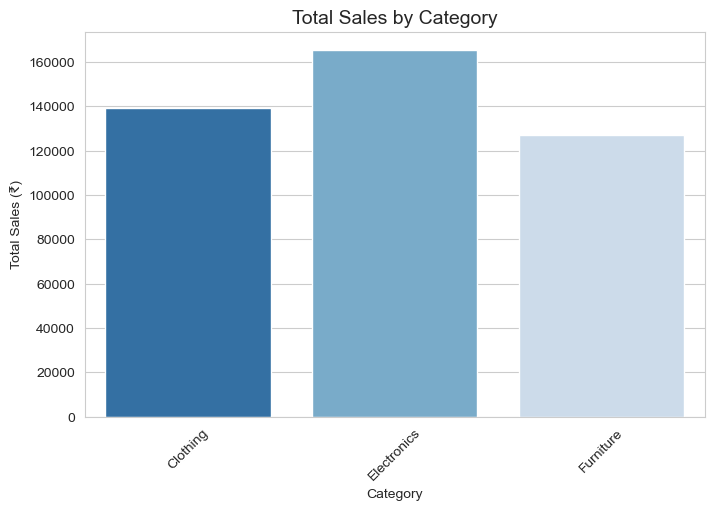

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Bar plot for total sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Amount", data=total_sales_by_category, palette="Blues_r")

plt.title("Total Sales by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()


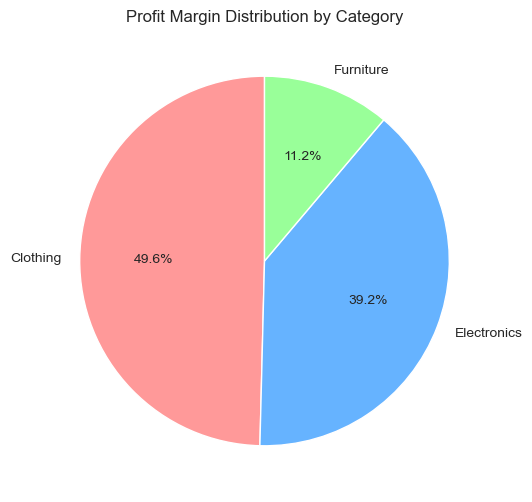

In [22]:
# Pie chart for profit margin by category
plt.figure(figsize=(6, 6))
plt.pie(profit_margin_by_category["Profit Margin (%)"], labels=profit_margin_by_category["Category"],
        autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99"], startangle=90)

plt.title("Profit Margin Distribution by Category")
plt.show()


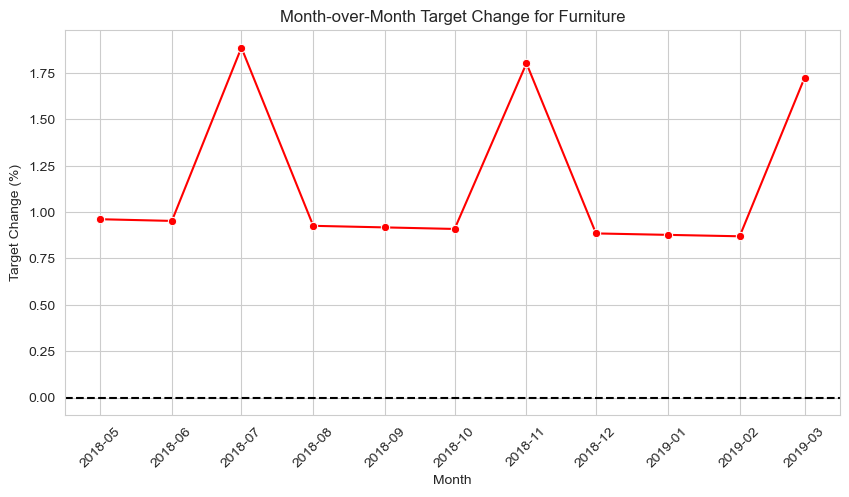

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=furniture_target_df, x="Month of Order Date", y="Target Change (%)", marker="o", color="red")

plt.axhline(0, color="black", linestyle="dashed")  # Reference line at 0%
plt.title("Month-over-Month Target Change for Furniture")
plt.xlabel("Month")
plt.ylabel("Target Change (%)")
plt.xticks(rotation=45)
plt.show()


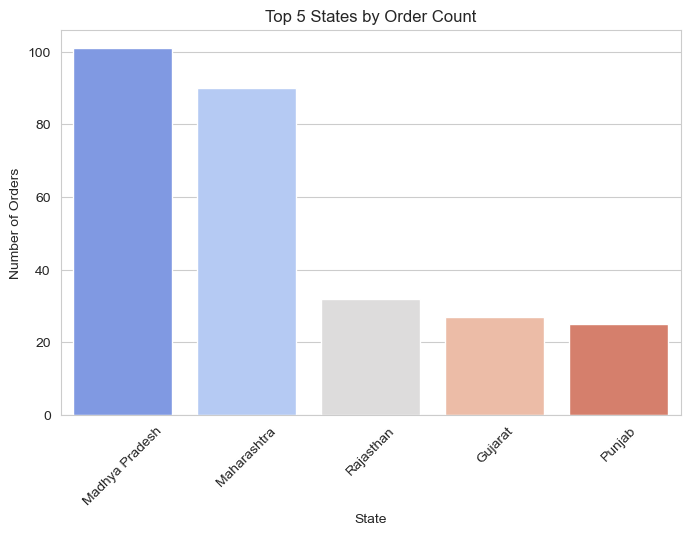

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x="State", y="Order Count", data=top_states, palette="coolwarm")

plt.title("Top 5 States by Order Count")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


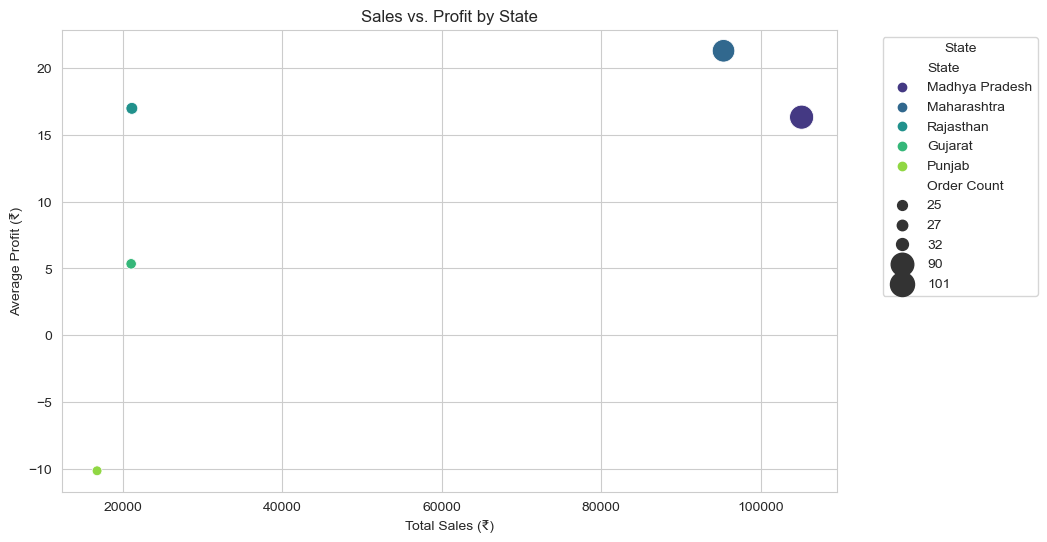

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_states_performance, x="Amount", y="Profit", hue="State", size="Order Count", sizes=(50, 300), palette="viridis")

plt.title("Sales vs. Profit by State")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Average Profit (₹)")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


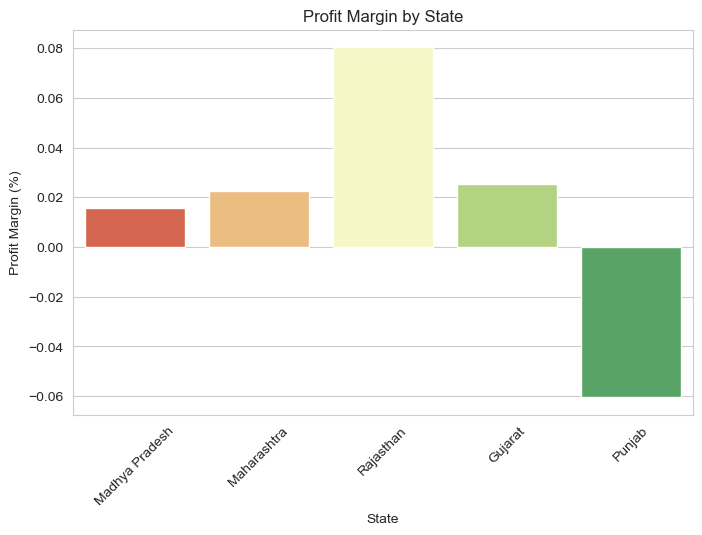

In [26]:
# Calculate profit margin for each state
top_states_performance["Profit Margin (%)"] = (top_states_performance["Profit"] / top_states_performance["Amount"]) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x="State", y="Profit Margin (%)", data=top_states_performance, palette="RdYlGn")

plt.title("Profit Margin by State")
plt.xlabel("State")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()


In [27]:
# Count the number of orders per city
top_cities = orders_df["City"].value_counts().head(5).reset_index()
top_cities.columns = ["City", "Order Count"]

# Display the top 5 cities
print("Top 5 Cities by Order Count:")
print(top_cities)


Top 5 Cities by Order Count:
         City  Order Count
0      Indore           76
1      Mumbai           68
2  Chandigarh           30
3       Delhi           25
4      Bhopal           22


In [28]:
# Filter data for only the top 5 cities
top_cities_list = top_cities["City"].tolist()
top_cities_data = merged_df[merged_df["City"].isin(top_cities_list)]

# Group by city and calculate total sales and average profit
city_sales_profit = top_cities_data.groupby("City").agg(
    Total_Sales=("Amount", "sum"),
    Average_Profit=("Profit", "mean")
).reset_index()

# Merge with top cities order count data
top_cities_performance = pd.merge(top_cities, city_sales_profit, on="City")

# Display the final results
print("Top 5 Cities Performance Summary:")
print(top_cities_performance)


Top 5 Cities Performance Summary:
         City  Order Count  Total_Sales  Average_Profit
0      Indore           76      79069.0       15.576779
1      Mumbai           68      61867.0        7.908213
2  Chandigarh           30      21142.0        2.422535
3       Delhi           25      25019.0       43.308642
4      Bhopal           22      23583.0       13.196970


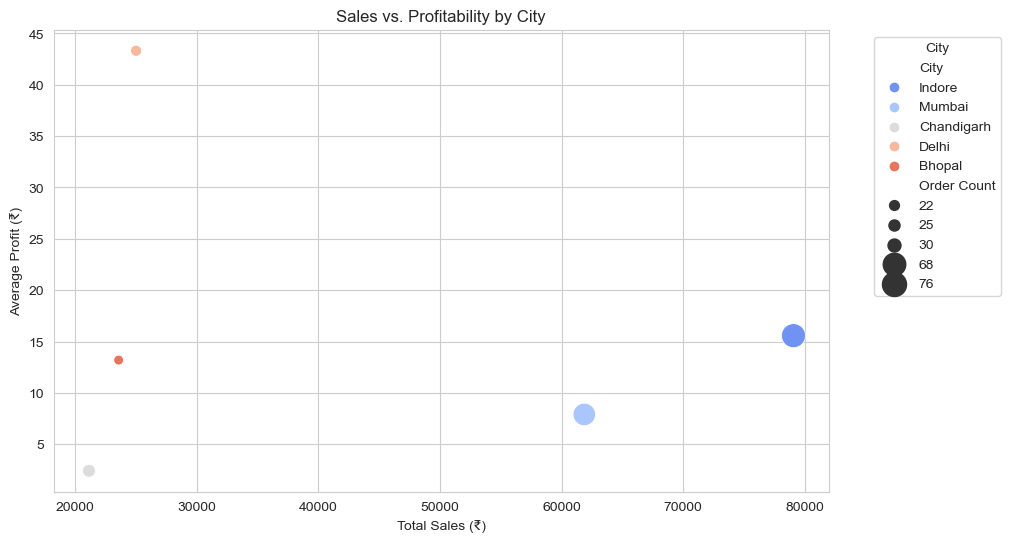

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_cities_performance, x="Total_Sales", y="Average_Profit", hue="City", size="Order Count", sizes=(50, 300), palette="coolwarm")

plt.title("Sales vs. Profitability by City")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Average Profit (₹)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


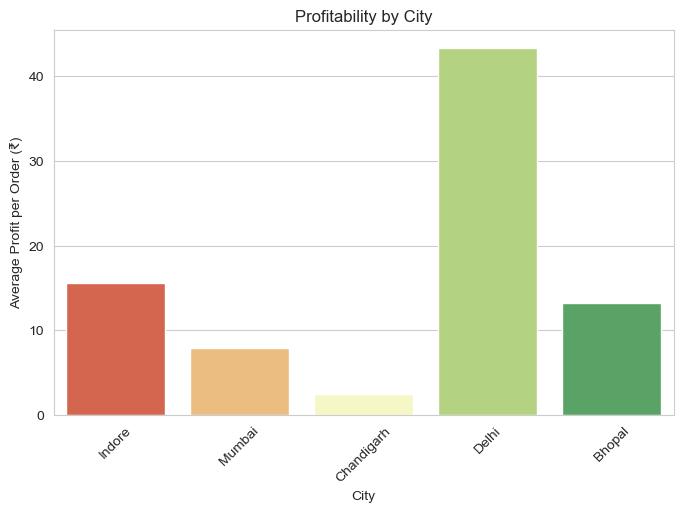

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x="City", y="Average_Profit", data=top_cities_performance, palette="RdYlGn")

plt.title("Profitability by City")
plt.xlabel("City")
plt.ylabel("Average Profit per Order (₹)")
plt.xticks(rotation=45)
plt.show()
